# Machine Learning/Regression Analysis

Using scikit-learn libraries to create a supervised machine-learning model.  Utilizing Adidas' sales data from Kaggle.com, in an attempt to find correlation between various metrics for profitability.

<b>Tools Used:</b>

-Pandas

-NumPy

-Seaborn

-MatPlotLib

-scikit-Learn

### Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Option that ensures that graphs are displayed within notebook without being called
%matplotlib inline

In [3]:
path = r'C:\Users\steve\Documents\CF - Achieve_6'

In [4]:
df = pd.read_excel(os.path.join(path, 'Data', 'AdidasDataset_Cleaned.xlsx'))

### Check and Clean for Dataset

In [5]:
# Quick reference for dataset content
df.head()

,Unnamed: 0,retailer,invoice,region,state,city,product,price_per_unit,units_sold,income,profit,profit_margin,sales_method
0,0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


#### Missing Values Check:

In [6]:
# Checking for null values
df.isnull().sum()

Unnamed: 0        0
retailer          0
invoice           0
region            0
state             0
city              0
product           0
price_per_unit    0
units_sold        0
income            0
profit            0
profit_margin     0
sales_method      0
dtype: int64

#### Duplicates Check:

In [7]:
# Checking for duplicates
dup_df = df.duplicated()
dup_df.shape

(9644,)

No instances of null values or duplicated content.  Previous cleanup attempts showed that all values were within reason.  Moving forward with Regression Testing analysis.

## Performing EDA via Visualization:

Checking the relationship between a few variables to determine if there are any connections worth exploring further.  Going to document each category comparison to reference in the future.

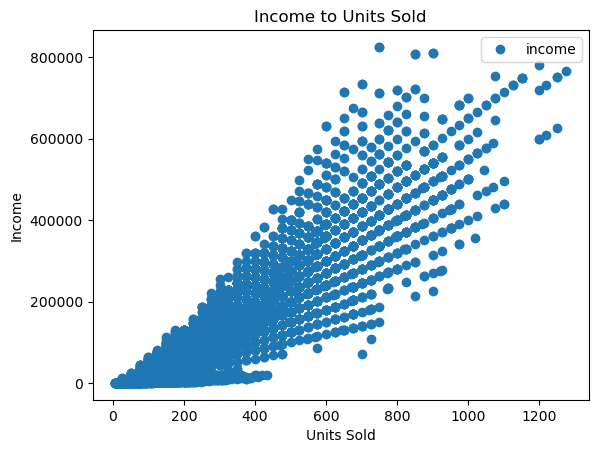

In [8]:
# Starting with a predictable chart, ideally you generate more income the more units sold
# Using style o for dots vs. lines
df.plot(x = 'units_sold', y='income',style='o')
plt.title('Income to Units Sold')  
plt.xlabel('Units Sold')  
plt.ylabel('Income')  
plt.show()

#### Insight:
There appears to be a medium correlation to between income and number of units sold.  While there are some breakaway points, the general idea is that as more units are sold, more income is generated.  This is evidence by the higher lows for income, as the number of units sold increases.

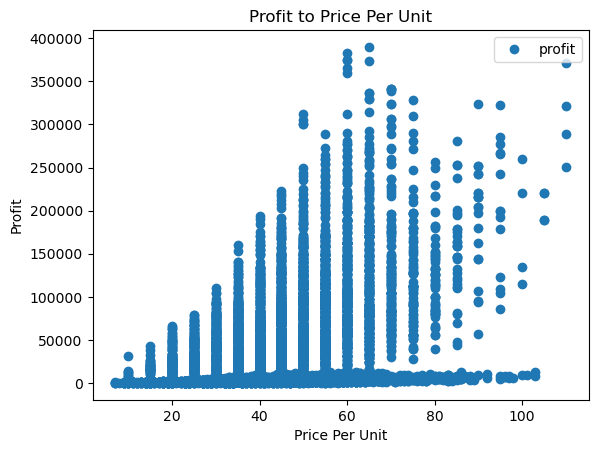

In [9]:
# It would be ideal to see if there were a correlation between pricing and profit
df.plot(x = 'price_per_unit', y='profit',style='o')
plt.title('Profit to Price Per Unit')  
plt.xlabel('Price Per Unit')  
plt.ylabel('Profit')  
plt.show()

#### Insight:
While there might be the feigntest relationship between profit and the price per unit, there are quite a few examples of higher priced products generating the same amount of profit as the lowest priced items.  I believe this will result in a weak to non-existent level of correlation.

## Regression Analysis

In [10]:
# Reshaping the variables into NumPy arrays and storing them into separate objects
X = df['price_per_unit'].values.reshape(-1,1)
y = df['profit'].values.reshape(-1,1)

In [11]:
X

array([[50.],
       [50.],
       [40.],
       ...,
       [41.],
       [42.],
       [29.]])

In [12]:
y

array([[300000.  ],
       [150000.  ],
       [140000.  ],
       ...,
       [  2791.28],
       [  1234.8 ],
       [   649.89]])

In [13]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
# Creating a regression object
regression_df = LinearRegression()

In [15]:
# Need to fit the regression object for training set
regression_df.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predicting the values of y, using X
y_predicted = regression_df.predict(X_test)

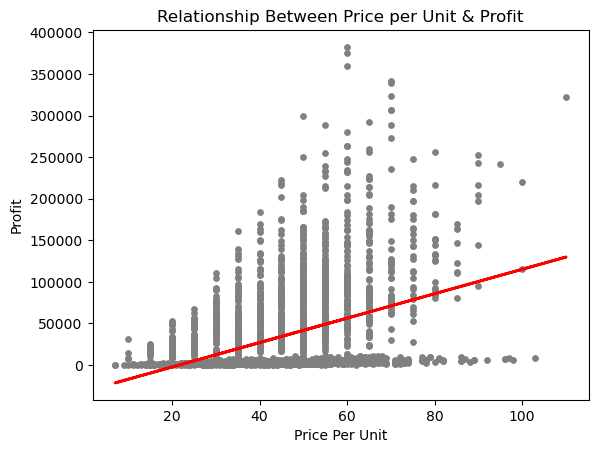

In [17]:
# Creating a plot with regression line, using test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=2)
plot_test.title('Relationship Between Price per Unit & Profit')
plot_test.xlabel('Price Per Unit')
plot_test.ylabel('Profit')
plot_test.show()

#### Insight:
The regression line appears to fairly untouched by most of the points on the chart.  There appears to be a large amount of variation between profits and the cost of a unit, so much so that the price per unit cannot reliably predict its overall profitability.  While the bottom half of the regression line is not as profitable as the top half, the densitity suggest there are as many if not more points below than above.

In [18]:
# Creating objects to contain summary statistics for model
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [19]:
# Printing values within those objects
print('Slope: ',regression_df.coef_)
print('Mean squared error: ',rmse)
print('R2 score: ',r2)

Slope:  [[1469.59407461]]
Mean squared error:  2473090373.880573
R2 score:  0.14553672873205958


In [20]:
compare_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare_df.head()

,Actual,Predicted
0,63000.00,12244.808087
1,82500.00,41636.689579
2,514.80,48984.659952
3,1317.12,3427.243639
4,1394.25,25471.154759


#### Insight:
The model cannot make an accurate prediction based on the current variables.  It looks like there are too many variations from the price of a product and the profit it generates.  This may be due to the cost to make the product and variations of products within the same price range.

For example, if a shoe were about `$80.00` and a sweatshirt as well, it may be possible that the shoe has less of a profit margin than the sweatshirt.  Due to that, the model cannot make an accurate assessment.

## Examining Training Values

The results from above were conclusive.  Our model would not be able to predict profits based on how many units were sold.  For the sake of clarity, running the same tests on the training data to see if the results varied.

In [21]:
# Out of curiosity, as that prediction model went was very off, lets see how it looks on the training set
# Predicting the training set

y_predicted_train = regression_df.predict(X_train)

In [22]:
# Creating objects to contain summary statistics for model
rmse_2 = mean_squared_error(y_train, y_predicted_train)
r2_2 = r2_score(y_train, y_predicted_train)

In [23]:
# Printing values within those objects
print('Slope: ',regression_df.coef_)
print('Mean squared error: ',rmse_2)
print('R2 score: ',r2_2)

Slope:  [[1469.59407461]]
Mean squared error:  2483654814.8176513
R2 score:  0.1596882449743655


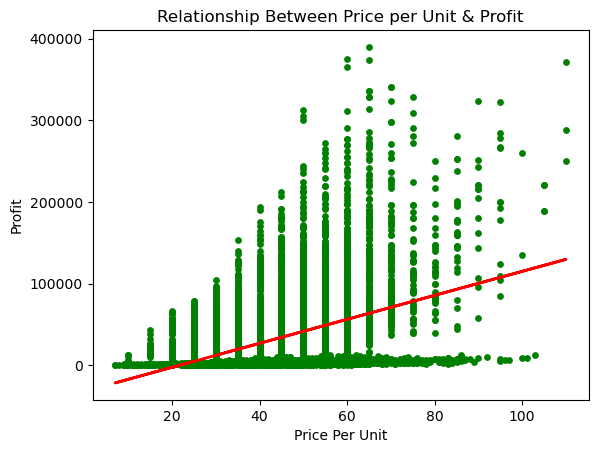

In [24]:
plot_test_train = plt
plot_test_train.scatter(X_train, y_train, color='green', s = 15)
plot_test_train.plot(X_train, y_predicted_train, color='red', linewidth =2)
plot_test_train.title('Relationship Between Price per Unit & Profit')
plot_test_train.xlabel('Price Per Unit')
plot_test_train.ylabel('Profit')
plot_test_train.show()

#### Insights:
Results were essentially the same.  We can try to look elsewhere for a stronger correlation to build a prediction tool.

## Additional Investigation
Looking into the regression analysis for Income and its relationship to profit margin.

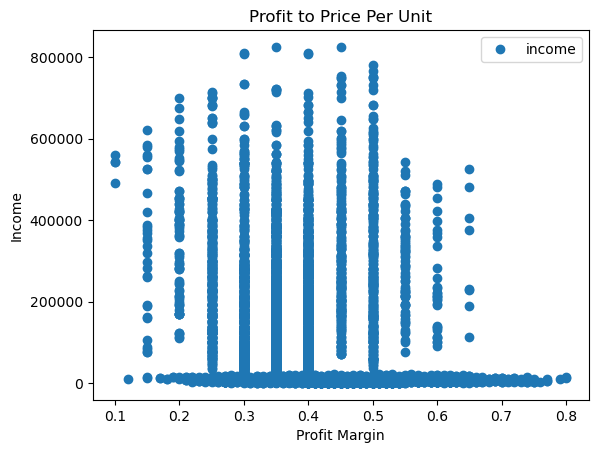

In [25]:
# It would be ideal to see if there were a correlation between income and profit margin
df.plot(x = 'profit_margin', y='income',style='o')
plt.title('Profit to Price Per Unit')  
plt.xlabel('Profit Margin')  
plt.ylabel('Income')  
plt.show()

In [26]:
# Creating regression analysis for the above
# Reshaping the variables into NumPy arrays and storing them into separate objects
X = df['profit_margin'].values.reshape(-1,1)
y = df['income'].values.reshape(-1,1)

In [27]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
# Creating a regression object
regression2_df = LinearRegression()

In [29]:
# Need to fit the regression object for training set
regression2_df.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predicting the values of y, using X
y_predicted = regression2_df.predict(X_test)

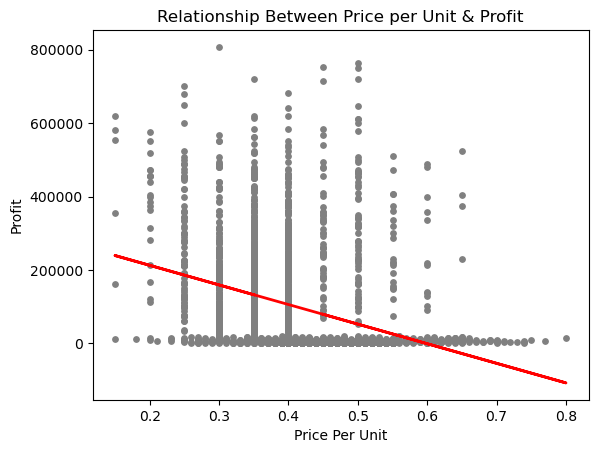

In [31]:
# Creating a plot with regression line, using test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth=2)
plot_test.title('Relationship Between Price per Unit & Profit')
plot_test.xlabel('Price Per Unit')
plot_test.ylabel('Profit')
plot_test.show()

In [32]:
# Creating objects to contain summary statistics for model
rmse2 = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [33]:
# Printing values within those objects
print('Slope: ',regression2_df.coef_)
print('Mean squared error: ',rmse2)
print('R2 score: ',r2)

Slope:  [[-533563.27835899]]
Mean squared error:  16938888026.375591
R2 score:  0.1301546544362645
